# Image Processing with Python: Introduction to Computer Vision
by: Jephraim C. Manansala  |  Published on https://jephraim-manansala.medium.com/

### Ever wondered how computers represent image data? 

In this post, we will be doing just that! Image Processing using Python will open your eyes to how images can be represented using computer vision, mathematics, and programming.

This will serve as the first installment in the series of posts that I will be publishing about conducting image processing techniques using Python. I will try to be as detailed as possible for beginners to understand.

Let’s begin.

First, we import libraries such as `numpy`, and `matplotlib`. Additionally, we import specific functions from the `skimage` library. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2gray, rgb2hsv, gray2rgb
from skimage import img_as_uint
import warnings 
warnings.filterwarnings('ignore')

I am sure we are all familiar with the binary numerical system wherein various information can be represented using 1s and 0s. Using these 1s and 0s, we can form a 2-dimensional NumPy array wherein each cell in the NumPy array serves as a pixel in the image. We have:

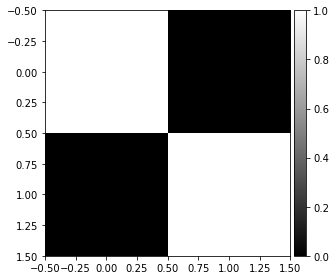

In [2]:
array = np.array([[1, 0], 
                  [0, 1]])
imshow(array, cmap='gray');

It is quite intuitive that the 1s are represented as white (full intensity), and the 0s are represented as black (no intensity). However, we should also consider the partial intensity between these two values. Let’s create a NumPy array that explores this.

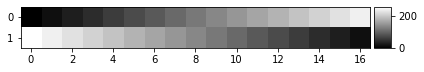

In [3]:
array_spectrum = np.array([np.arange(0,255,15), 
                           np.arange(255,0,-15)])
imshow(array_spectrum, cmap = 'gray');

Notice that we assigned an integer value of 255 to correspond to the full intensity. In computer vision, each pixel is represented by an integer value ranging from 0 (which means the absence of light) to 255 (which means the highest light intensity). In between these two values are the varying light intensities that gradually transitions from black to white.

This means that there is actually 256 shades of gray — and not 50!

However, please do note that what we have tackled so far is only single-channel images. Single-channel images can only show grayscale images. To represent images in color, we can use the RGB channels. It has three channels — one for Red, one for Green, and one for Blue. This is shown below.

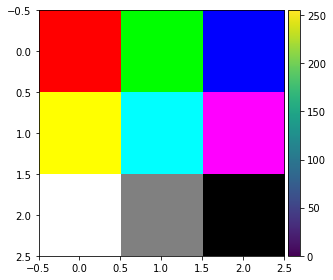

In [4]:
array_colors = np.array([[[255, 0, 0],   [0, 255, 0],   [0, 0, 255]],
                         [[255, 255, 0], [0, 255, 255], [255, 0, 255]],
                         [[255, 255, 255], [128, 128, 128], [0, 0, 0]]])
imshow(array_colors);

Each cell has three channels. Notice that we can represent other colors using these three channels by combining different intensities in the RGB channels. For example, the color yellow is achieved by combining the red and green channels. Note that the RGB channels are in a specific order and cannot be interchanged.

Now, let’s try to test our learnings on an actual image. Here, I have a photo of a Chocolate Mousse cake and pizzas.

The image shape is: (2736, 3648, 3)


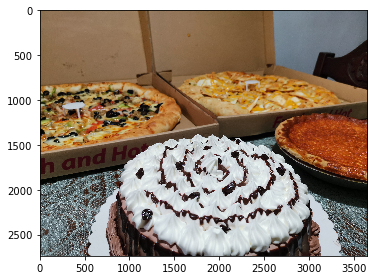

In [5]:
food = imread('food.jpg')
imshow(food);
print("The image shape is:", food.shape)

By checking the image’s shape attribute, we can see that it has three channels — as evident on the third value in the tuple. The three channels are used to represent the various colors in the image.

Now, let’s try to convert the image into grayscale.

The image shape is: (2736, 3648)


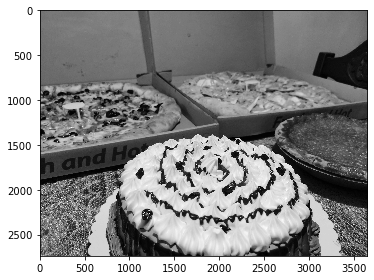

In [6]:
food_gray = rgb2gray(food)
imshow(food_gray);
print("The image shape is:", food_gray.shape)

Using the `rgb2gray` function, we were able to convert the image from a colored image into a grayscale one. The three channels of the original image have been represented into a single channel by varying the intensity values in each pixel from 0 to 255.

Now, as mentioned, the grayscale image contains 256 different shades of gray. However, specific image processing problems would require us to have only two values. To achieve this, we can binarize our image by setting a threshold value — all values below this threshold will be 0, and all values above this threshold will be 1.

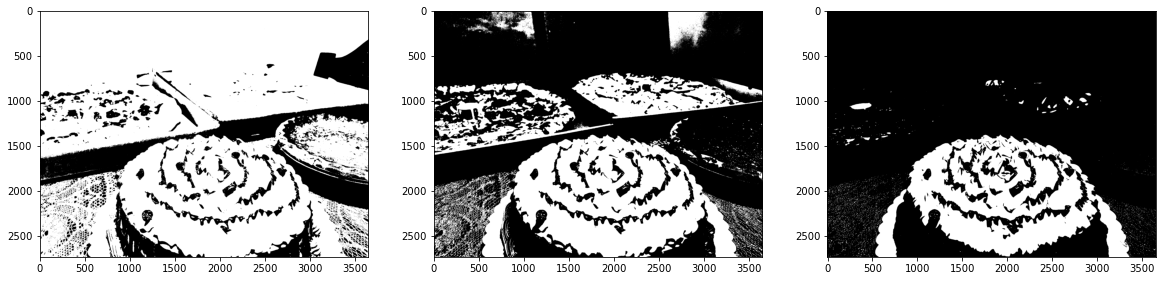

In [7]:
figure, axis = plt.subplots(1, 3, figsize=(20,5))
percentiles = [0.25, 0.50, 0.75]
for percent, ax in zip(percentiles, axis):
    food_binary = img_as_uint(food_gray > percent)
    ax.imshow(food_binary, cmap='gray');

Notice that the high-intensity values are at the foreground of the image while the low-intensity values are at the background of the image. This insight can be particularly useful in future image processing problems.

Now, let us try to revert the grayscale image into an RGB image.

The image shape is: (2736, 3648, 3)


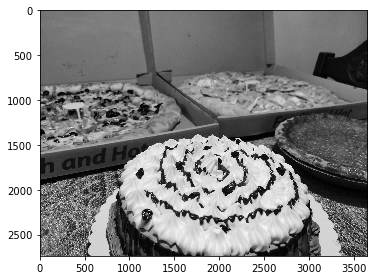

In [8]:
food_color = gray2rgb(food_gray)
imshow(food_color);
print("The image shape is:", food_color.shape)

Is the image in RGB? Well, yes and no. Yes — because the image now has three channels, which are the RGB channels. However, the image is still in grayscale. Note that we cannot convert a grayscale image into an RGB one because of the lack of information in the grayscale image. Remember that colors are represented by the ratio of intensity values in the three channels and that information is simply not available in a grayscale image. What the gray2rgb function only does is to duplicate cells three times to have three channels.

Now, let’s try to look at each of the RGB channels of the original image.

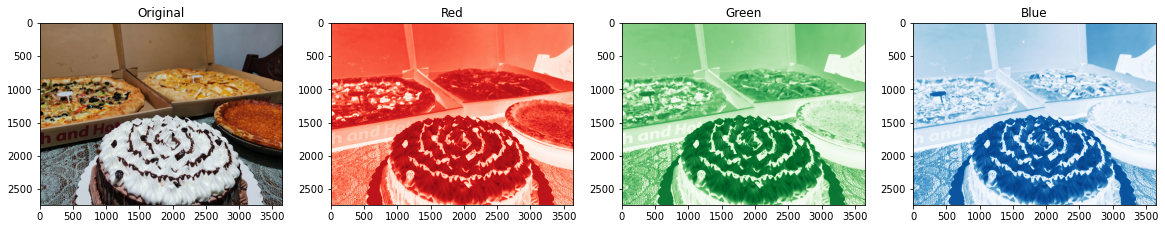

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(20,4))
ax[0].imshow(food)
ax[0].set_title('Original')
ax[1].imshow(food[:,:,0], cmap='Reds')
ax[1].set_title('Red')
ax[2].imshow(food[:,:,1], cmap='Greens')
ax[2].set_title('Green')
ax[3].imshow(food[:,:,2], cmap='Blues')
ax[3].set_title('Blue');

We can see that all RGB channels have high-intensity values to achieve the color white from the image. This is in contrast with the color black, wherein all of the RGB channels have low-intensity values. This is because computer vision utilized the “additive color model,” wherein the combination of all colors will result in white and vice versa.

Aside from the RGB channels, we can also utilize other color spaces. One of the most useful color space is the HSV or the Hue, Saturation, and Value.

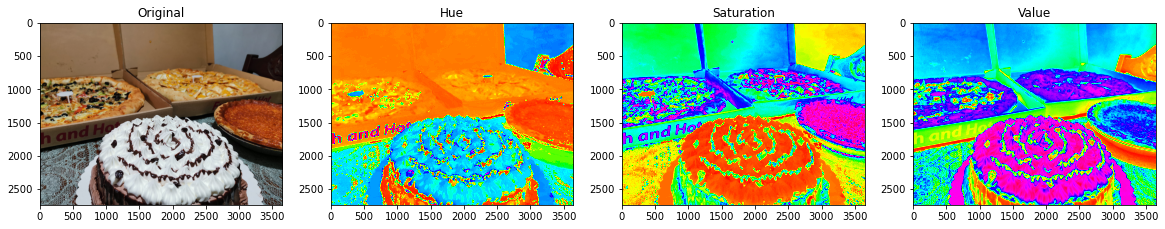

In [10]:
food_hsv = rgb2hsv(food)
fig, ax = plt.subplots(1, 4, figsize=(20,4))
ax[0].imshow(food)
ax[0].set_title('Original')

img = ax[1].imshow(food_hsv[:,:,0], cmap='hsv')
ax[1].set_title('Hue')

ax[2].imshow(food_hsv[:,:,1], cmap='hsv')
ax[2].set_title('Saturation')

ax[3].imshow(food_hsv[:,:,2], cmap='hsv')
ax[3].set_title('Value');


As the name suggests, it represents the colors in the image by quantifying each pixel’s hue, saturation, and value. This is particularly useful in determining the difference of objects with the same shade of color that might not be obvious when seen in the RGB channels

#### In summary

We have explored how computers can represent images in various color spaces — such as the grayscale, binary, RGB, and the HSV. Depending on the application, these color spaces can be handy in analyzing and representing the images.